# Insurance Claims- Fraud Detection

#### Problem Statement:

##### Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, we have a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this project, we create a predictive model that predicts if an insurance claim is fraudulent or not. 

WORK:

1) IMPORTING LIBRARIES

2) LOADING DATASET & DESCRIPTION

3) DATA PREPROCESSING OF DATA

4) EXPLORATORY DATA ANALYSIS

5) SPLITING DATA AND APPLYING train_test_split

6) FINDING BEST RANDOM STATE

7) FINDING BEST ALGORITHM

8) GRID SEARCH CV

9) TUNNING WITH BEST PARAMETERS

10) AUC_ROC CURVE

11) SAVING OUR MODEL

12) RESULTS & CONCLUSION

#### TARGET VARIABLE:

In this context, the use classification models to predict the "fraud_reported".

"fraud_reported" is our target varaible.

In [101]:
## importing libraries

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [102]:
# loading dataset

df = pd.read_csv("Automobile_insurance_fraud.csv")

In [103]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [104]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [105]:
# displaying all columns

pd.set_option("display.max_columns",None)

In [106]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [107]:
df.size

40000

In [108]:
# looking last 10 rows

df.tail(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
990,286,43,663190,05-02-1994,IL,100/300,500,1564.43,3000000,477644,FEMALE,MD,prof-specialty,movies,unmarried,77500,-32800,31-01-2015,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,NY,Northbrook,4755 1st St,18,1,?,2,2,YES,34290,3810,3810,26670,Jeep,Grand Cherokee,2013,N,NaN
991,257,44,109392,12-07-2006,OH,100/300,1000,1280.88,0,433981,MALE,MD,other-service,basketball,other-relative,59400,-32200,06-02-2015,Single Vehicle Collision,Rear Collision,Total Loss,Other,WV,Riverwood,5312 Francis Ridge,21,1,NO,0,1,NO,46980,0,5220,41760,Accura,TL,2002,N,NaN
992,94,26,215278,24-10-2007,IN,100/300,500,722.66,0,433696,MALE,MD,exec-managerial,camping,husband,50300,0,23-01-2015,Multi-vehicle Collision,Front Collision,Major Damage,Fire,OH,Springfield,1705 Weaver St,6,3,YES,1,2,YES,36700,3670,7340,25690,Nissan,Pathfinder,2010,N,NaN
993,124,28,674570,08-12-2001,OH,250/500,1000,1235.14,0,443567,MALE,MD,exec-managerial,camping,husband,0,-32100,17-02-2015,Multi-vehicle Collision,Side Collision,Total Loss,Other,OH,Hillsdale,1643 Washington Hwy,20,3,?,0,1,?,60200,6020,6020,48160,Volkswagen,Passat,2012,N,NaN
994,141,30,681486,24-03-2007,IN,500/1000,1000,1347.04,0,430665,MALE,High School,sales,bungie-jumping,own-child,0,-82100,22-01-2015,Parked Car,?,Minor Damage,None,SC,Northbend,6516 Solo Drive,6,1,?,1,2,YES,6480,540,1080,4860,Honda,Civic,1996,N,NaN
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,FEMALE,Associate,sales,kayaking,husband,0,0,26-02-2015,Parked Car,?,Minor Damage,Police,WV,Columbus,1416 Cherokee Ridge,6,1,?,0,3,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [109]:
df.shape

(1000, 40)

In [110]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [111]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

# DESCRIBING DATA

The measures of central tendency and distribution are some measures to define the data set.

The measures used to define the central tendency are mean, median and mode.

The standard deviations (or variance) are the minimum and maximum values of variables. The table below is a summary of some statistical measures for each numeric predictor of the dataset:

mean: It indicates the average value around which each group of attributes is attested.

std (Standard Deviation): It indicates the standard deviation of each attribute group, from which we can guess the degree of data dispersion around the average.

max and min indicate the attribute that I assume the highest and lowest value for each attribute group.



In [112]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


describe function only shows the variable which are numeric.

That's why our target varaible i.e. fraud_reported is not showing beacuse it is given in object format.

In [113]:
# let's get the information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [114]:
# Look at the values in each columns 
for i in df:
    print(df[i].value_counts())
    print("____________________________________________________________")

194    8
285    7
140    7
230    7
128    7
      ..
347    1
113    1
337    1
117    1
0      1
Name: months_as_customer, Length: 391, dtype: int64
____________________________________________________________
43    49
39    48
41    45
34    44
30    42
31    42
38    42
37    41
33    39
32    38
40    38
29    35
46    33
35    32
36    32
42    32
44    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
25    14
49    14
55    14
50    13
53    13
61    10
24    10
54    10
60     9
51     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
22     1
20     1
19     1
Name: age, dtype: int64
____________________________________________________________
116735    1
107181    1
430794    1
115399    1
328387    1
         ..
218456    1
179538    1
357713    1
247116    1
296960    1
Name: policy_number, Length: 1000, dtype: int64
____________________________________________________________
05-08-1992    3
01-01-2006    3
28-04-1992    3


# EXPLORATORY DATA ANALYSIS

N    753
Y    247
Name: fraud_reported, dtype: int64

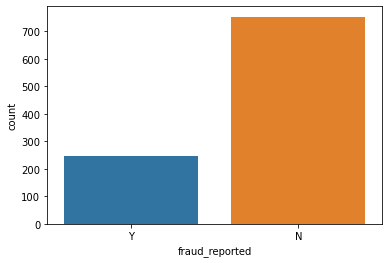

In [115]:
#Get the count of fraud_reported(our target variable)

sns.countplot(x = 'fraud_reported', data = df)
df["fraud_reported"].value_counts()

The counts of "NO" fraud_reported is higher.

## Univariate analysis of Categorical varaibles:

In [116]:
df.select_dtypes(include=['object']).columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

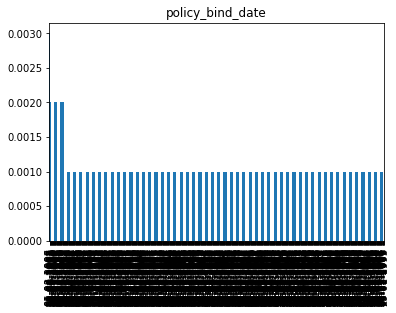

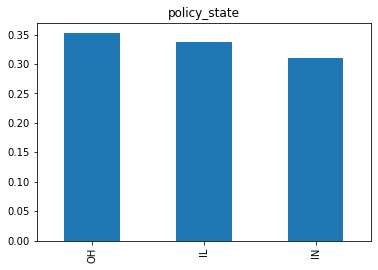

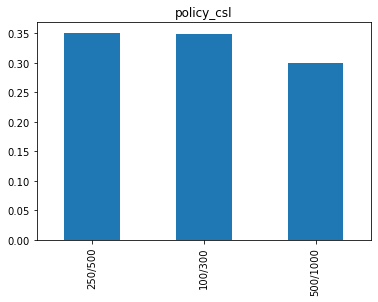

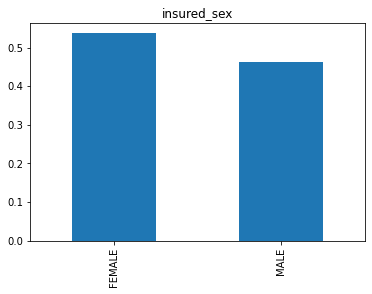

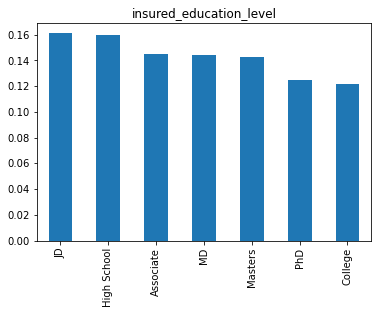

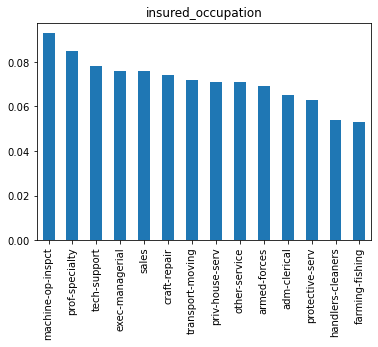

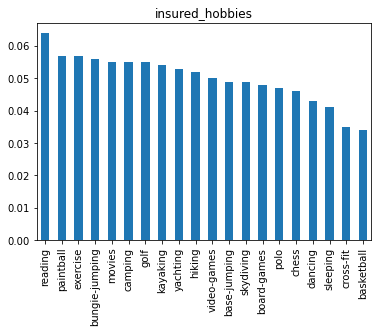

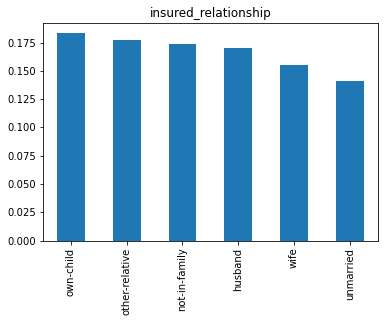

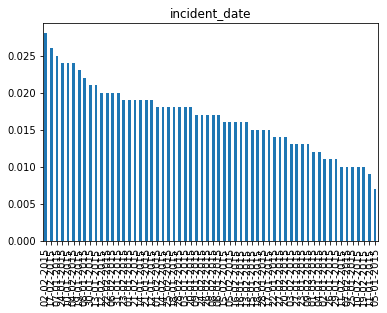

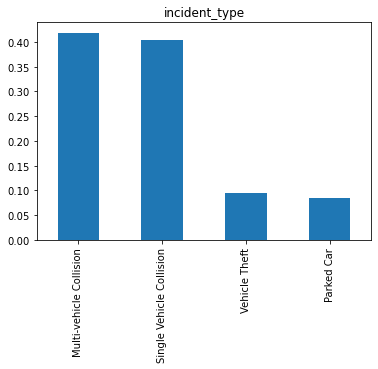

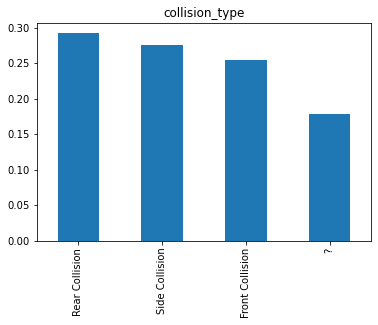

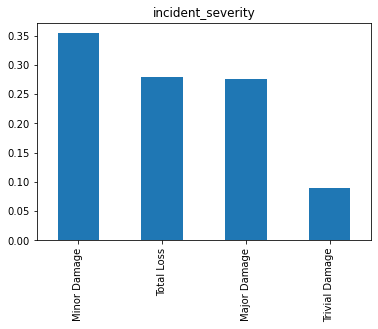

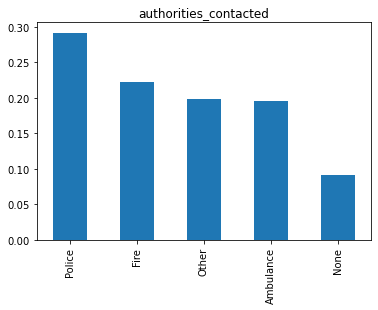

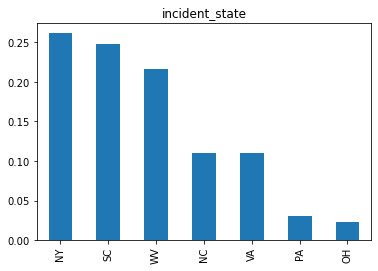

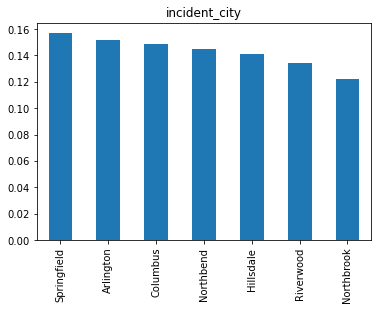

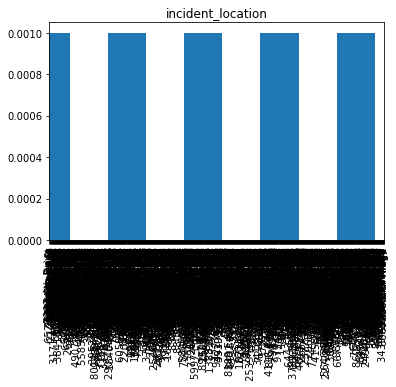

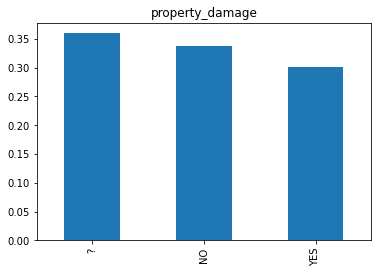

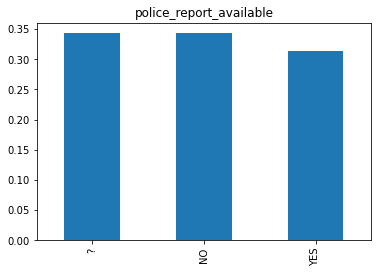

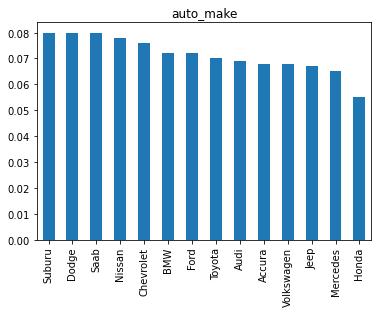

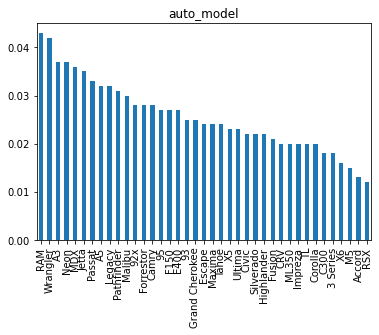

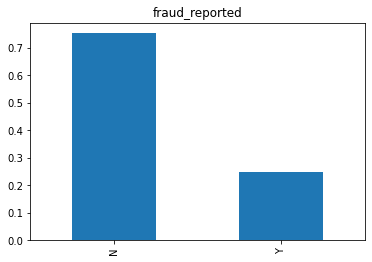

In [117]:
for i in df.columns:
    if df[i].dtypes== "object":
        df[i].value_counts(normalize=True).plot.bar(figsize=(6,4), title=i)
        plt.show()        

OBSERVATIONS:

1) No of Females who have taken insurance for their vechiles are more than males.

2) machine-op-inspectors are the one who have taken insurance more for their vechiles.

3) insured_hobbies as "reading" has opted for insurance more.

4) insured_relationship who has own-child are the once who buyed insurance more for their vechile.

5) vechile collision cases are more

6) rear collision tyoe is more.

7) in most of cases incident severity is minior.

8) people contacted with Police in most of the cases of incident.

9) most of the incidents happened in NY state.

10) most of the cases of incidents happend in springfield city.

11) in most of the cases of incident there is no property damage.

12) No police report is availabel in most of the cases.


    

### Analysis of Categorical Independent Variable with Target variable:

Text(0.5, 1.0, 'policy_state wrt fraud_reported')

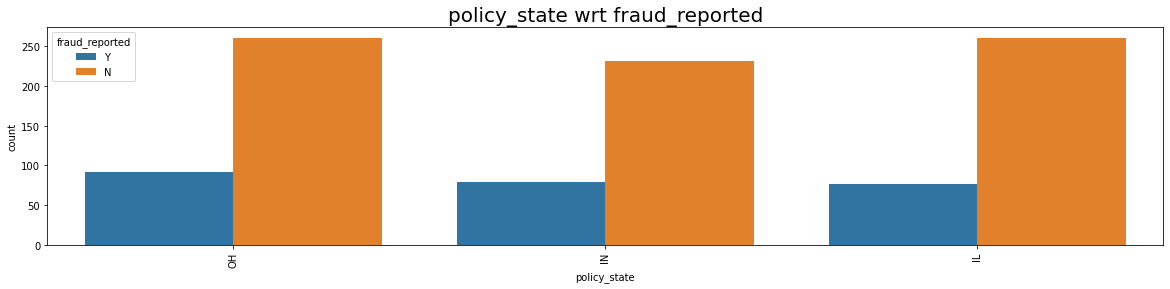

In [118]:
plt.subplots(figsize=(20,4))
sns.countplot(x="policy_state",hue="fraud_reported",data=df)
plt.xticks(rotation = 90)
plt.title('policy_state wrt fraud_reported', fontsize = 20)

Text(0.5, 1.0, 'policy_csl wrt fraud_reported')

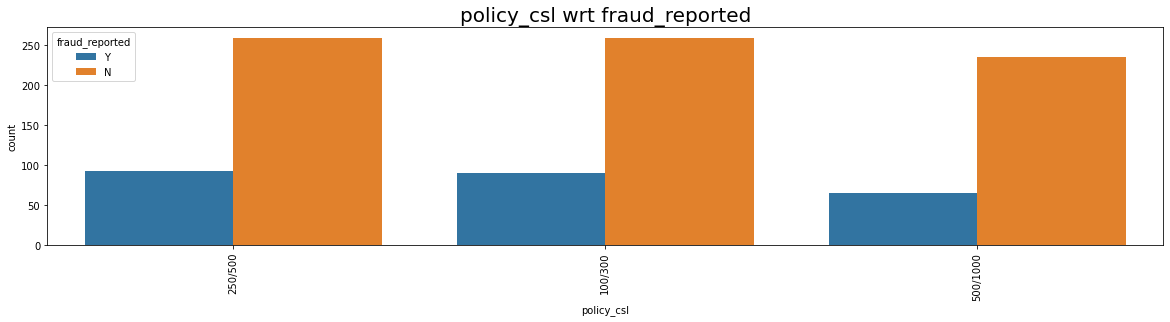

In [119]:
plt.subplots(figsize=(20,4))
sns.countplot(x="policy_csl",hue="fraud_reported",data=df)
plt.xticks(rotation = 90)
plt.title('policy_csl wrt fraud_reported', fontsize = 20)

Text(0.5, 1.0, 'insured_sex wrt fraud_reported')

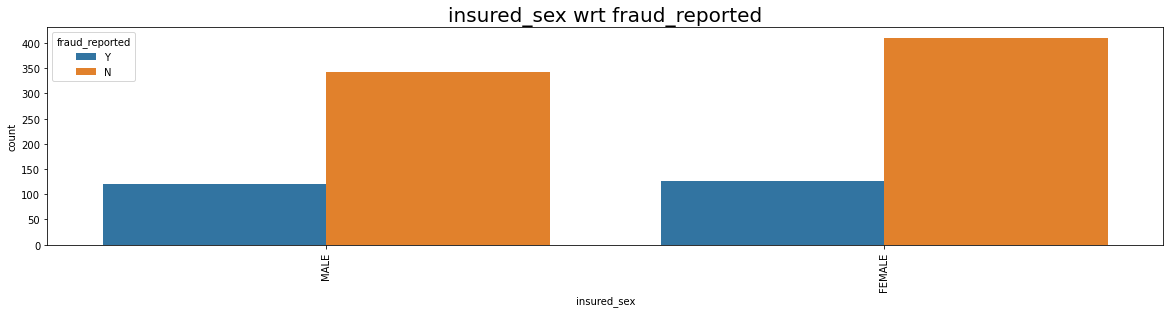

In [120]:
plt.subplots(figsize=(20,4))
sns.countplot(x="insured_sex",hue="fraud_reported",data=df)
plt.xticks(rotation = 90)
plt.title('insured_sex wrt fraud_reported', fontsize = 20)

Text(0.5, 1.0, 'insured_education_level wrt fraud_reported')

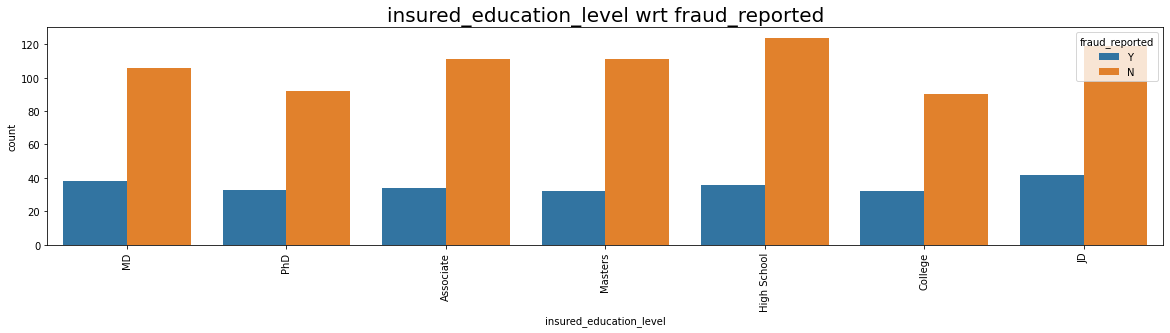

In [121]:
plt.subplots(figsize=(20,4))
sns.countplot(x="insured_education_level",hue="fraud_reported",data=df)
plt.xticks(rotation = 90)
plt.title('insured_education_level wrt fraud_reported', fontsize = 20)

Text(0.5, 1.0, 'insured_occupation wrt fraud_reported')

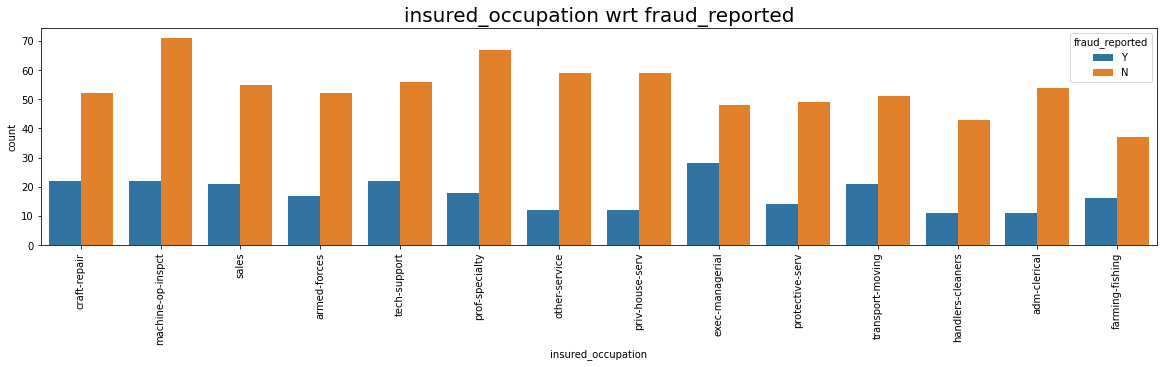

In [122]:
plt.subplots(figsize=(20,4))
sns.countplot(x="insured_occupation",hue="fraud_reported",data=df)
plt.xticks(rotation = 90)
plt.title('insured_occupation wrt fraud_reported', fontsize = 20)

Text(0.5, 1.0, 'insured_hobbies wrt fraud_reported')

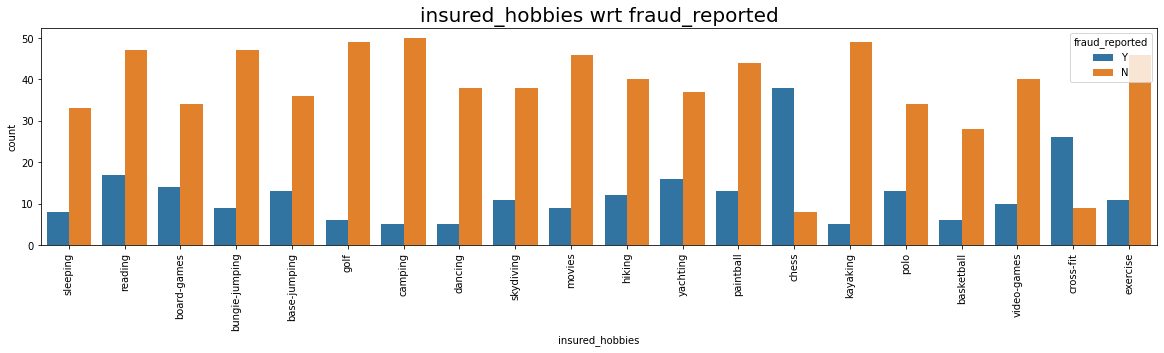

In [123]:
plt.subplots(figsize=(20,4))
sns.countplot(x="insured_hobbies",hue="fraud_reported",data=df)
plt.xticks(rotation = 90)
plt.title('insured_hobbies wrt fraud_reported', fontsize = 20)

Text(0.5, 1.0, 'insured_relationship wrt fraud_reported')

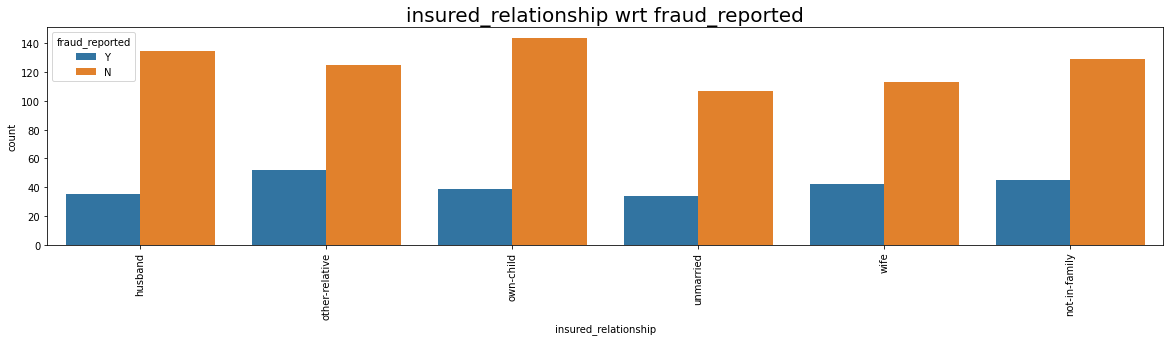

In [124]:
plt.subplots(figsize=(20,4))
sns.countplot(x="insured_relationship",hue="fraud_reported",data=df)
plt.xticks(rotation = 90)
plt.title('insured_relationship wrt fraud_reported', fontsize = 20)

Text(0.5, 1.0, 'incident_type wrt fraud_reported')

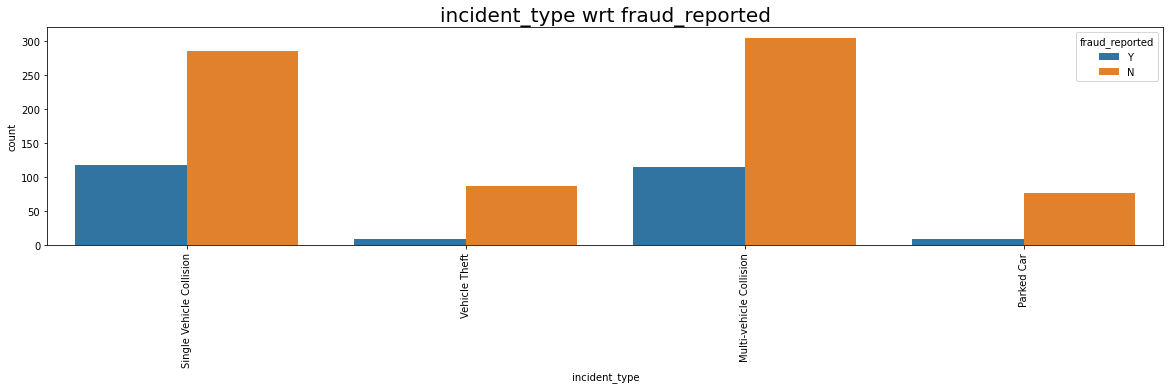

In [125]:
plt.subplots(figsize=(20,4))
sns.countplot(x="incident_type",hue="fraud_reported",data=df)
plt.xticks(rotation = 90)
plt.title('incident_type wrt fraud_reported', fontsize = 20)

Text(0.5, 1.0, 'collision_type wrt fraud_reported')

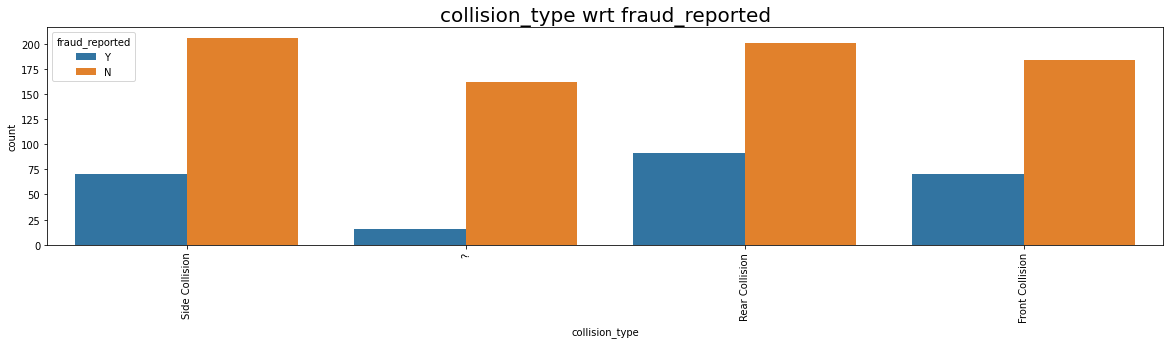

In [126]:
plt.subplots(figsize=(20,4))
sns.countplot(x="collision_type",hue="fraud_reported",data=df)
plt.xticks(rotation = 90)
plt.title('collision_type wrt fraud_reported', fontsize = 20)

Text(0.5, 1.0, 'incident_severity wrt fraud_reported')

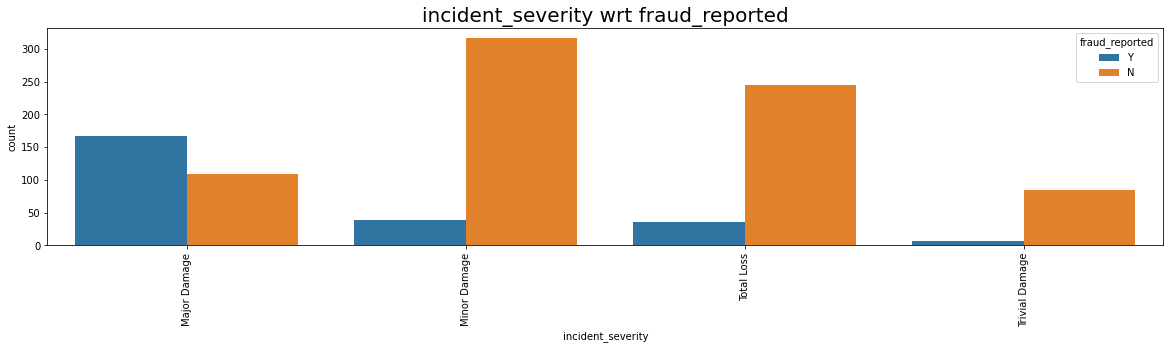

In [127]:
plt.subplots(figsize=(20,4))
sns.countplot(x="incident_severity",hue="fraud_reported",data=df)
plt.xticks(rotation = 90)
plt.title('incident_severity wrt fraud_reported', fontsize = 20)

Text(0.5, 1.0, 'authorities_contacted wrt fraud_reported')

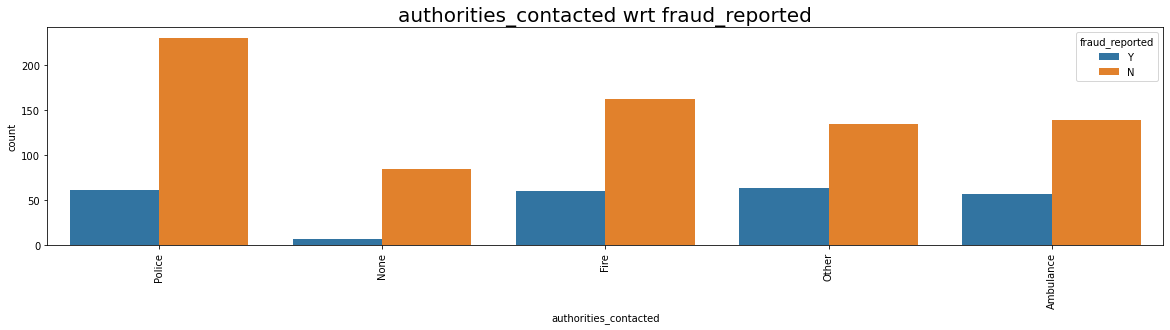

In [128]:
plt.subplots(figsize=(20,4))
sns.countplot(x="authorities_contacted",hue="fraud_reported",data=df)
plt.xticks(rotation = 90)
plt.title('authorities_contacted wrt fraud_reported', fontsize = 20)

Text(0.5, 1.0, 'incident_state wrt fraud_reported')

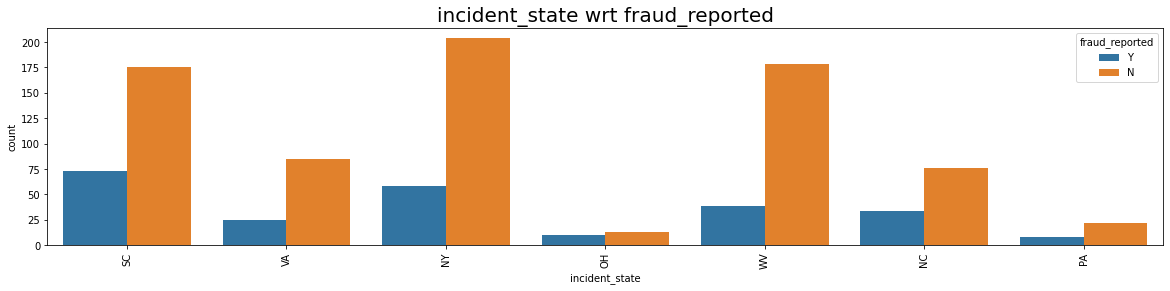

In [129]:
plt.subplots(figsize=(20,4))
sns.countplot(x="incident_state",hue="fraud_reported",data=df)
plt.xticks(rotation = 90)
plt.title('incident_state wrt fraud_reported', fontsize = 20)

Text(0.5, 1.0, 'incident_city wrt fraud_reported')

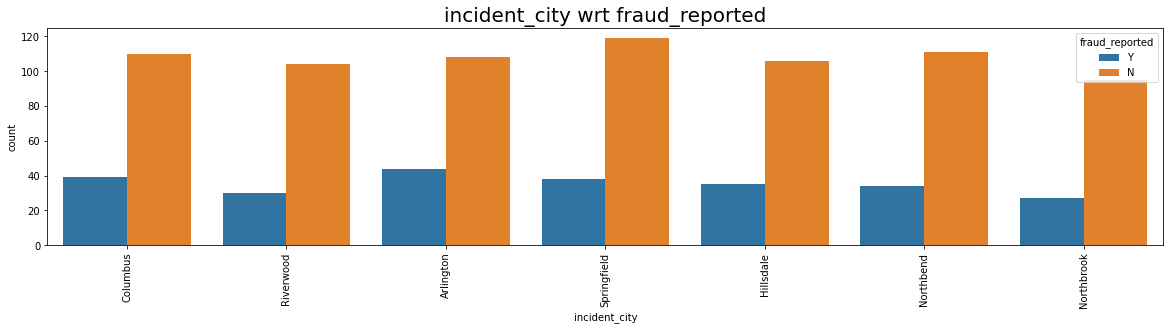

In [130]:
plt.subplots(figsize=(20,4))
sns.countplot(x="incident_city",hue="fraud_reported",data=df)
plt.xticks(rotation = 90)
plt.title('incident_city wrt fraud_reported', fontsize = 20)

Text(0.5, 1.0, 'property_damage wrt fraud_reported')

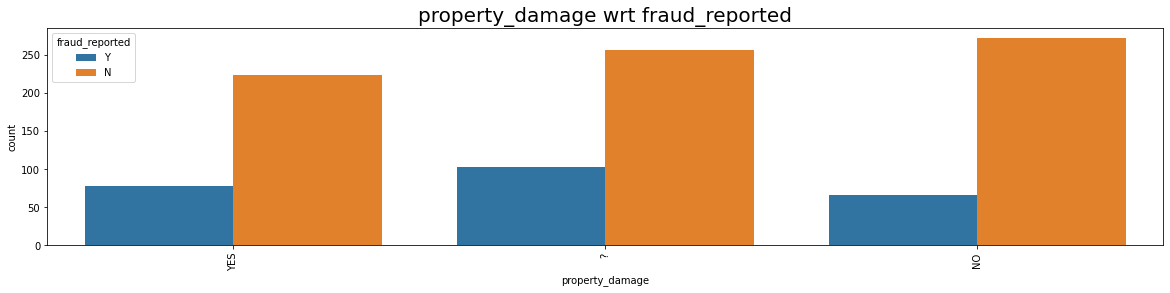

In [131]:
plt.subplots(figsize=(20,4))
sns.countplot(x="property_damage",hue="fraud_reported",data=df)
plt.xticks(rotation = 90)
plt.title('property_damage wrt fraud_reported', fontsize = 20)

Text(0.5, 1.0, 'bodily_injuries wrt fraud_reported')

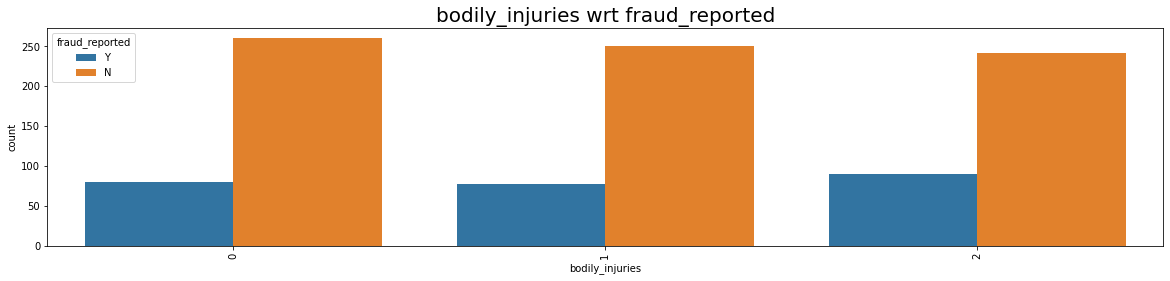

In [132]:
plt.subplots(figsize=(20,4))
sns.countplot(x="bodily_injuries",hue="fraud_reported",data=df)
plt.xticks(rotation = 90)
plt.title('bodily_injuries wrt fraud_reported', fontsize = 20)

Text(0.5, 1.0, 'witnesses wrt fraud_reported')

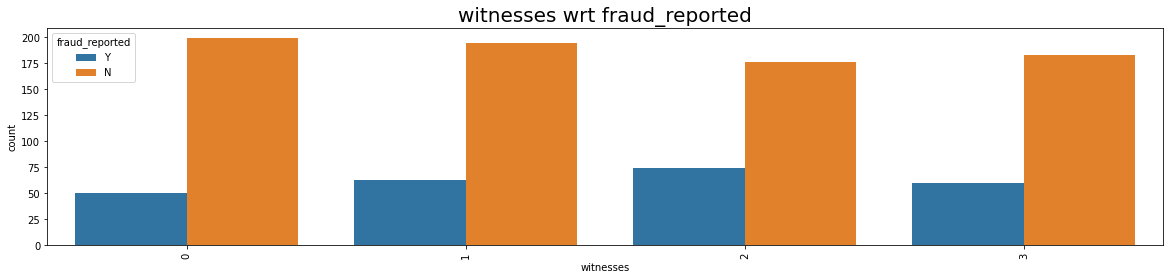

In [133]:
plt.subplots(figsize=(20,4))
sns.countplot(x="witnesses",hue="fraud_reported",data=df)
plt.xticks(rotation = 90)
plt.title('witnesses wrt fraud_reported', fontsize = 20)

Text(0.5, 1.0, 'police_report_available wrt fraud_reported')

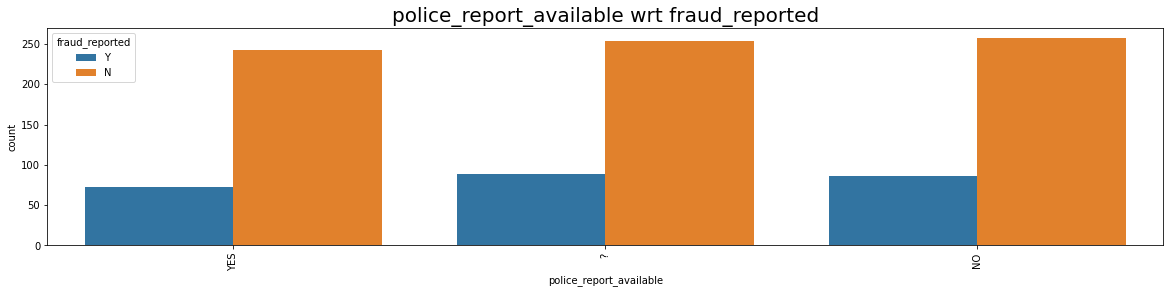

In [134]:
plt.subplots(figsize=(20,4))
sns.countplot(x="police_report_available",hue="fraud_reported",data=df)
plt.xticks(rotation = 90)
plt.title('police_report_available wrt fraud_reported', fontsize = 20)

Text(0.5, 1.0, 'auto_make wrt fraud_reported')

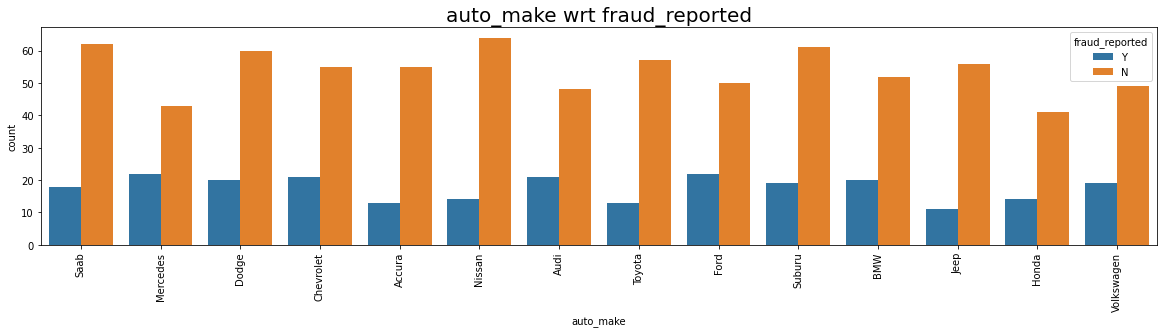

In [135]:
plt.subplots(figsize=(20,4))
sns.countplot(x="auto_make",hue="fraud_reported",data=df)
plt.xticks(rotation = 90)
plt.title('auto_make wrt fraud_reported', fontsize = 20)

Text(0.5, 1.0, 'auto_model wrt fraud_reported')

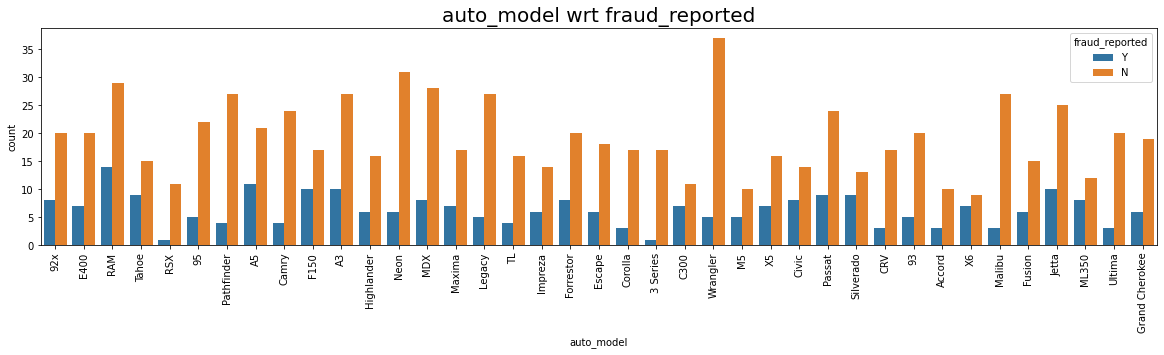

In [136]:
plt.subplots(figsize=(20,4))
sns.countplot(x="auto_model",hue="fraud_reported",data=df)
plt.xticks(rotation = 90)
plt.title('auto_model wrt fraud_reported', fontsize = 20)

### Analysis of Variable which are Continous:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D8B8D086D0>,
      dtype=object)

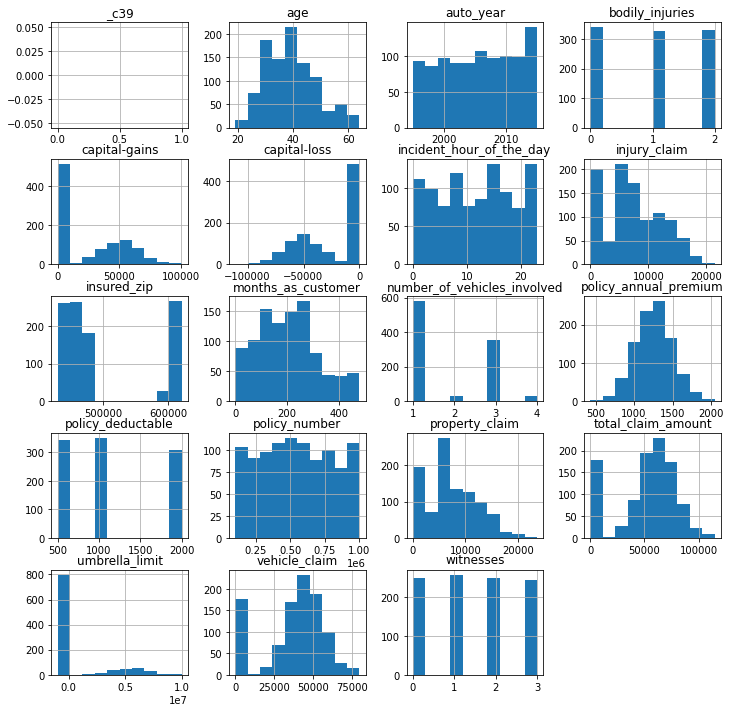

In [137]:
# we use histogram for showing our continous variables.

df.hist(figsize=(12,12),sharex=False)

# DATA PRE-PROCESSING

### CLEANING OUR DATASET

Data Cleaning and pre-processing is very important part to create any machine learning model. The cleaner the data will be, the better the prediction will come.

This data provided is raw and we have to run many functions to clean.

In [139]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In column name "_c39", all the cells are empty.

This is irrelevant to our predictions.

we will drop this column.

## Droping irrelevant columns:

In [140]:
df = df.drop(columns = ['policy_number', 'insured_zip', 'policy_bind_date', 'incident_date', 'incident_location', '_c39', 'auto_year', 'incident_hour_of_the_day'])

df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,NY,Arlington,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,N


In [141]:
# check unique values in dataset

df.apply(lambda x: len(x.unique()))

months_as_customer             391
age                             46
policy_state                     3
policy_csl                       3
policy_deductable                3
policy_annual_premium          991
umbrella_limit                  11
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_type                    4
collision_type                   4
incident_severity                4
authorities_contacted            5
incident_state                   7
incident_city                    7
number_of_vehicles_involved      4
property_damage                  3
bodily_injuries                  3
witnesses                        4
police_report_available          3
total_claim_amount             763
injury_claim                   638
property_claim                 626
vehicle_claim       

In [142]:
# looking "?" is present in which columns:

symbol = {}
for i in list(df.columns):
    if (df[i]).dtype == object:
        j = np.sum(df[i] == "?")
        symbol[i] = j
symbol = pd.DataFrame.from_dict(symbol, orient = 'index')
print(symbol)

                           0
policy_state               0
policy_csl                 0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0
fraud_reported             0


##### 1) Handling "?" in column "collision_type"

In [143]:
df["collision_type"].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [144]:
# replacing "?" with 0

df['collision_type'].replace(to_replace='?', value=0, inplace=True)
df['collision_type'].replace(to_replace='Rear Collision', value=1, inplace=True)
df['collision_type'].replace(to_replace='Side Collision', value=2, inplace=True)
df['collision_type'].replace(to_replace='Front Collision', value=3, inplace=True)

In [145]:
## again checking the counts of "collision_type"

df["collision_type"].value_counts()

1    292
2    276
3    254
0    178
Name: collision_type, dtype: int64

##### 2) Handling "?" in column "property_damage"

In [146]:
df["property_damage"].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [147]:
# replace "?" with NaN values

df['property_damage'] = df['property_damage'].replace('?',np.nan)

In [148]:
# replace NaN vales with mode

df['property_damage']=df['property_damage'].fillna(df['property_damage'].mode()[0])

In [149]:
## again checking counts

df["property_damage"].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

##### 3) Handling "?" in column "police_report_available"

In [150]:
df["police_report_available"].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [151]:
# replace "?" with NaN values

df['police_report_available'] = df['police_report_available'].replace('?',np.nan)

In [152]:
# replace NaN vales with mode

df['police_report_available']=df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [153]:
## ## again checking counts

df["police_report_available"].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

# LabelEncoding

In [154]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [155]:
# encoding the columns which are in string format into numeric format

for i in df.columns:
    if df[i].dtypes== "object":
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))

In [156]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,2,1,1000,1406.91,0,1,4,2,17,0,53300,0,2,2,0,4,4,1,1,1,1,2,1,71610,6510,13020,52080,10,1,1
1,228,42,1,1,2000,1197.22,5000000,1,4,6,15,2,0,0,3,0,1,4,5,5,1,0,0,0,0,5070,780,780,3510,8,12,1
2,134,29,2,0,2000,1413.14,5000000,0,6,11,2,3,35100,0,0,1,1,4,1,1,3,0,2,3,0,34650,7700,3850,23100,4,30,0
3,256,41,0,1,2000,1415.74,6000000,0,6,1,2,4,48900,-62400,2,3,0,4,2,0,1,0,1,2,0,63400,6340,6340,50720,3,34,1
4,228,44,0,2,1000,1583.91,6000000,1,0,11,2,4,66000,-46000,3,0,1,2,1,0,1,0,0,1,0,6500,1300,650,4550,0,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,0,0,5,2,13,4,0,0,2,3,1,1,0,4,1,1,0,1,0,87200,17440,8720,61040,6,6,0
996,285,41,0,0,1000,1436.79,0,0,6,9,17,5,70900,0,2,1,0,1,4,3,1,1,2,3,0,108480,18080,18080,72320,13,28,0
997,130,34,2,1,500,1383.49,3000000,0,5,1,3,2,35100,0,0,2,1,4,0,0,3,0,2,3,1,67500,7500,7500,52500,11,19,0
998,458,62,0,2,2000,1356.92,5000000,1,0,5,0,5,0,0,2,1,0,3,1,0,1,0,0,1,1,46980,5220,5220,36540,1,5,0


# FINDING CORRELATION

In [157]:
corr= df.corr()
corr

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.060925,-0.000833,0.009814,-0.093661,0.069727,0.006399,0.020209,-0.017377,0.076317,-0.059581,0.010021,0.005369,-0.000130,0.014736,0.005488,-0.010162,0.058383,-0.022146,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,0.020544
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.073337,0.000969,0.017220,-0.081315,0.074832,-0.007075,0.007368,-0.025626,0.089175,-0.058439,0.015417,0.005770,-0.002291,0.022102,-0.003408,-0.015679,0.052359,-0.020441,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.012143
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,0.012455,-0.029580,-0.020481,-0.034327,-0.031215,-0.038689,-0.018506,0.074551,-0.030338,0.031848,-0.045271,-0.026377,-0.016777,0.008723,-0.002077,-0.042263,-0.008465,0.013384,0.022960,0.069017,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.029432
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.023978,0.021636,-0.010757,0.009153,0.015788,-0.005960,-0.030063,0.005249,-0.034612,0.011997,-0.031153,0.022530,0.056182,0.032814,0.009333,-0.019403,-0.027634,-0.000595,0.071500,-0.001645,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.037190
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,-0.003245,0.010870,-0.009733,0.015217,-0.046733,0.004061,-0.022945,0.035212,-0.023544,-0.038411,0.034387,-0.015711,-0.000760,0.006517,-0.045117,0.051214,0.015770,-0.022765,0.066639,0.038036,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.014817
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.038853,-0.019715,0.035922,-0.018019,0.001925,-0.013738,0.023547,0.053603,0.001550,-0.011155,-0.055191,0.046434,0.048724,-0.045991,0.080738,0.026780,0.002332,0.021998,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.014480
umbrella_limit,0.015498,0.018126,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.010688,-0.019357,0.023422,-0.037000,0.077495,-0.047268,-0.024056,0.015966,-0.027871,0.009466,0.029044,-0.077492,0.013094,-0.021270,-0.076358,0.022743,-0.006738,-0.044771,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.058622
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.009733,0.038853,0.010688,1.000000,0.009002,-0.006160,-0.020317,0.002855,-0.020494,-0.021705,0.009952,0.002716,-0.028168,0.017914,-0.022379,0.014470,0.018793,0.026969,-0.020297,0.042463,0.006992,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,0.030873
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.015217,-0.019715,-0.019357,0.009002,1.000000,-0.020298,0.021807,-0.023488,0.039912,0.041193,0.013704,0.053103,-0.006420,-0.010838,-0.005903,-0.018636,-0.003768,-0.048909,-0.012072,0.019211,0.051640,0.074226,0.081880,0.055794,0.068348,0.055202,0.049445,0.008808
insured_occupation,0.009814,0.017220,-0.031215,0.015788,-0.046733,0.035922,0.023422,-0.006160,-0.020298,1.000000,-0.011077,-0.010171,-0.007824,-0.020171,0.003842,-0.000644,0.004731,-0.007811,-0.022761,0.000390,-0.015368,-0.016378,-0.000236,-0.014794,-0.025232,0.003692,0.020211,0.003004,-0.000829,0.042621,0.020584,0.001564


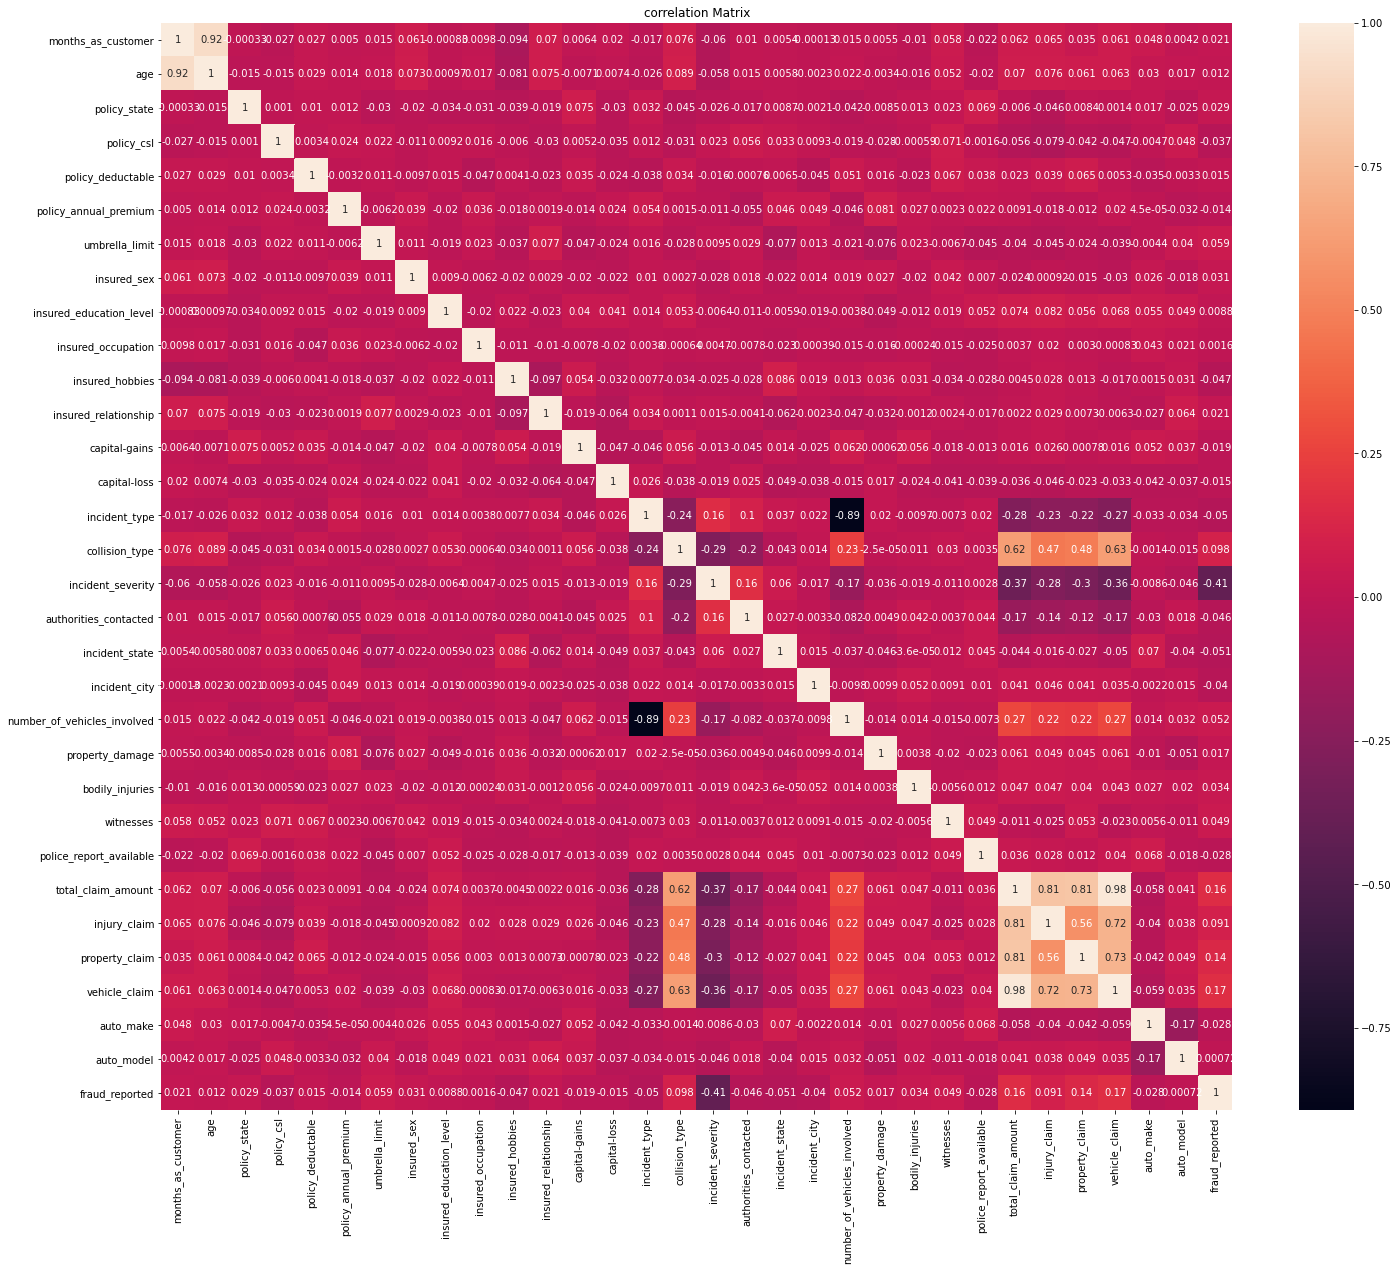

In [158]:
corr_mat=df.corr()   

plt.figure(figsize=[24,20])
sns.heatmap(corr_mat,annot=True)
plt.title("correlation Matrix")
plt.show()

We can visualize that there is no strong relationship with our target variables, this is beacuse most of columns were given in string format.

In [160]:
corr_matrix=df.corr()
corr_matrix["fraud_reported"].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
collision_type                 0.097857
injury_claim                   0.090975
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
property_damage                0.017202
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
insured_occupation             0.001564
auto_model                     0.000720
policy_annual_premium         -0.014480
capital-loss                  -0.014863
capital-gains                 -0.019173
auto_make                     -0.027519
police_report_available       -0.027768


<function matplotlib.pyplot.show(*args, **kw)>

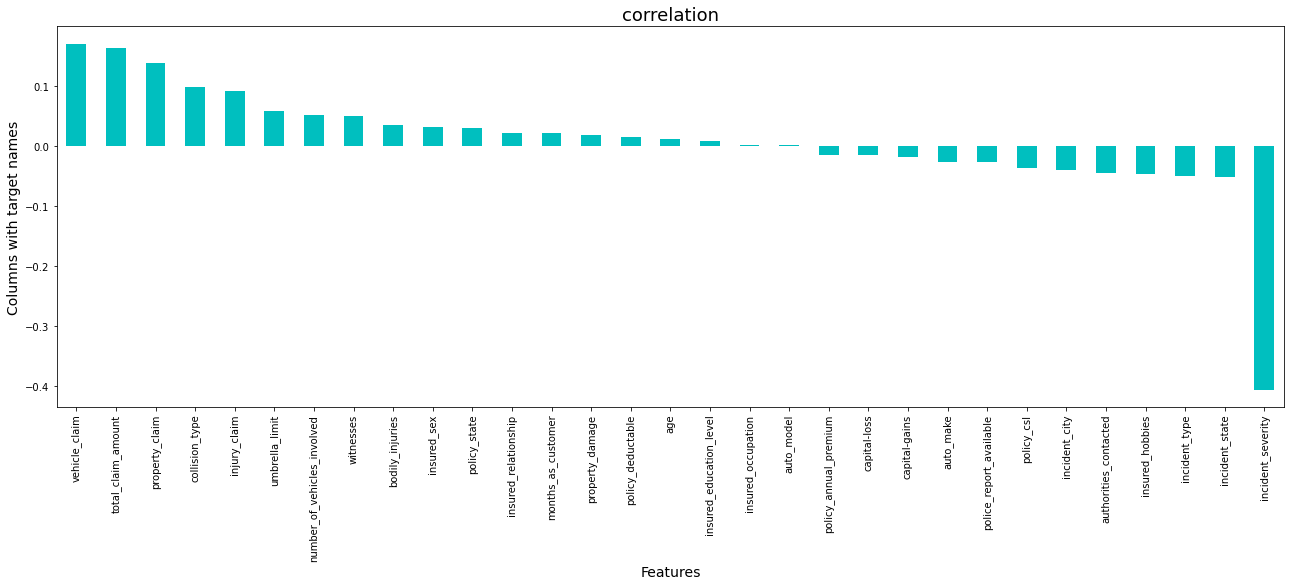

In [161]:
plt.figure(figsize=(22,7))
df.corr()["fraud_reported"].sort_values(ascending=False).drop(["fraud_reported"]).plot(kind="bar",color="c")
plt.xlabel("Features",fontsize=14)
plt.ylabel("Columns with target names", fontsize=14)
plt.title("correlation",fontsize=18)
plt.show

# Splitting the data into X & Y

In [162]:
x= df.drop("fraud_reported",axis=1)     # independent variable
y= df["fraud_reported"]                 # dependent variable

In [163]:
x.columns.size

31

In [164]:
x.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model'],
      dtype='object')

# SCALING

In [165]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

x=pd.DataFrame(scaler.fit_transform(x), columns= x.columns)

In [166]:
x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model
0,0.684760,0.644444,1.0,0.5,0.333333,0.603112,0.090909,1.0,0.666667,0.153846,0.894737,0.0,0.530348,1.000000,0.666667,0.666667,0.000000,1.00,0.666667,0.166667,0.000000,1.0,0.5,0.666667,1.0,0.622801,0.303497,0.550063,0.654296,0.769231,0.026316
1,0.475992,0.511111,0.5,0.5,1.000000,0.473214,0.545455,1.0,0.666667,0.461538,0.789474,0.4,0.000000,1.000000,1.000000,0.000000,0.333333,1.00,0.833333,0.833333,0.000000,0.0,0.0,0.000000,0.0,0.043285,0.036364,0.032953,0.043276,0.615385,0.315789
2,0.279749,0.222222,1.0,0.0,1.000000,0.606972,0.545455,0.0,1.000000,0.846154,0.105263,0.6,0.349254,1.000000,0.000000,0.333333,0.333333,1.00,0.166667,0.166667,0.666667,0.0,1.0,1.000000,0.0,0.300906,0.358974,0.162653,0.289722,0.307692,0.789474
3,0.534447,0.488889,0.0,0.5,1.000000,0.608582,0.636364,0.0,1.000000,0.076923,0.105263,0.8,0.486567,0.438344,0.666667,1.000000,0.000000,1.00,0.333333,0.000000,0.000000,0.0,0.5,0.666667,0.0,0.551298,0.295571,0.267850,0.637187,0.230769,0.894737
4,0.475992,0.555556,0.0,1.0,0.333333,0.712760,0.636364,1.0,0.000000,0.846154,0.105263,0.8,0.656716,0.585959,1.000000,0.000000,0.333333,0.50,0.166667,0.000000,0.000000,0.0,0.0,0.333333,0.0,0.055739,0.060606,0.027461,0.056359,0.000000,0.815789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.006263,0.422222,1.0,1.0,0.333333,0.543574,0.090909,0.0,0.833333,0.153846,0.684211,0.8,0.000000,1.000000,0.666667,1.000000,0.333333,0.25,0.000000,0.666667,0.000000,1.0,0.0,0.333333,0.0,0.758579,0.813054,0.368399,0.767015,0.461538,0.157895
996,0.594990,0.488889,0.0,0.0,0.333333,0.621622,0.090909,0.0,1.000000,0.692308,0.894737,1.0,0.705473,1.000000,0.666667,0.333333,0.000000,0.25,0.666667,0.500000,0.000000,1.0,1.0,1.000000,0.0,0.943912,0.842890,0.763836,0.908919,1.000000,0.736842
997,0.271399,0.333333,1.0,0.5,0.000000,0.588604,0.363636,0.0,0.833333,0.076923,0.157895,0.4,0.349254,1.000000,0.000000,0.666667,0.333333,1.00,0.000000,0.000000,0.666667,0.0,1.0,1.000000,1.0,0.587006,0.349650,0.316857,0.659580,0.846154,0.500000
998,0.956159,0.955556,0.0,1.0,1.000000,0.572145,0.545455,1.0,0.000000,0.384615,0.000000,1.0,0.000000,1.000000,0.666667,0.333333,0.000000,0.75,0.166667,0.000000,0.000000,0.0,0.0,0.333333,1.0,0.408291,0.243357,0.220532,0.458800,0.076923,0.131579


Now every column value is between 0 & 1. We can compare the data more accurately

# TREATING OUTLIERS

<function matplotlib.pyplot.show(*args, **kw)>

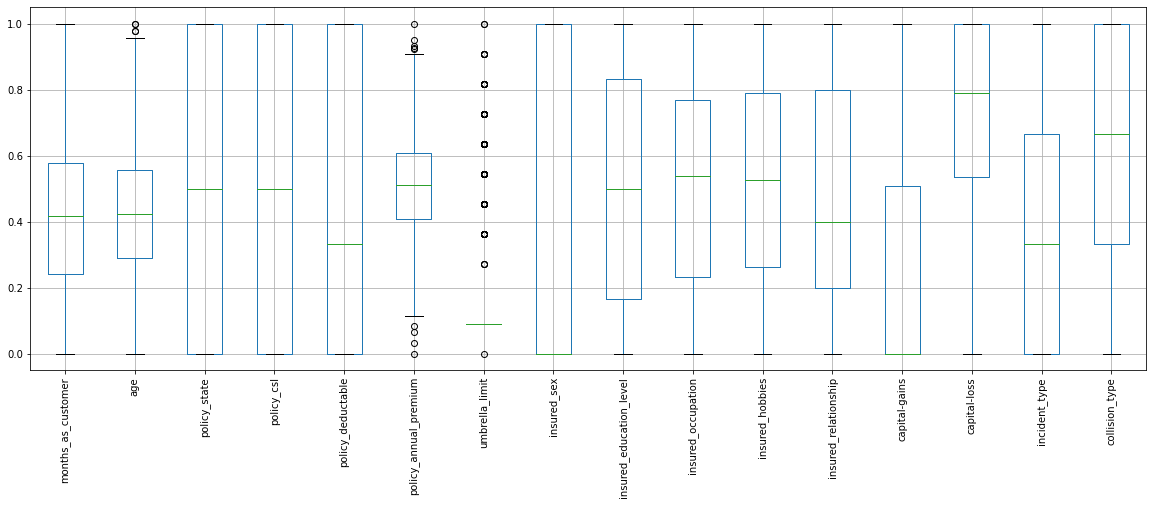

In [167]:
x.iloc[:,0:16].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation = 90)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

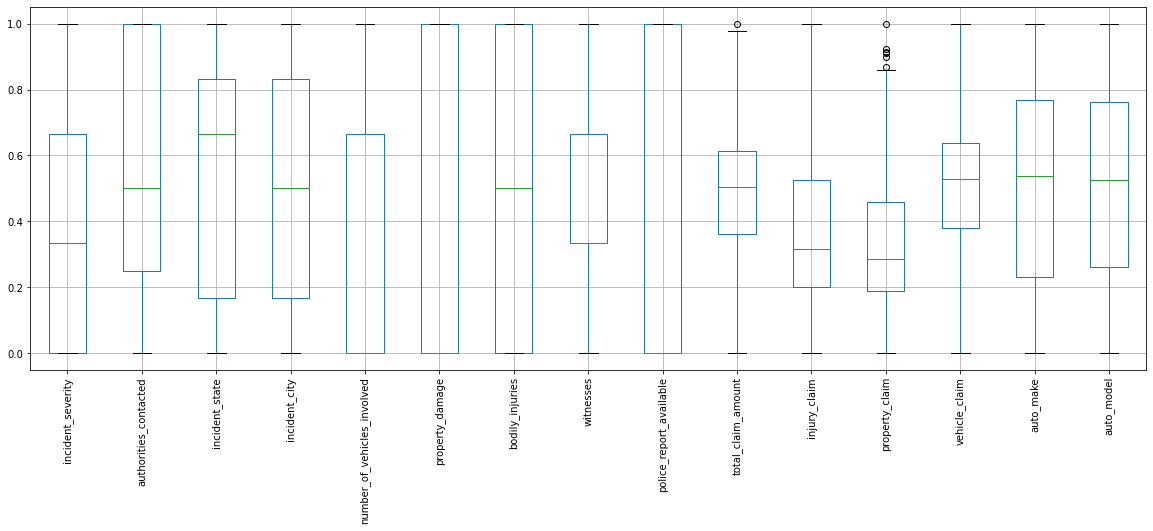

In [68]:
x.iloc[:,16:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation = 90)
plt.show

OBSERVATION:

Outliers are present in age, umbrella_limit, policy_annual_premium, total_claim_amount, property_claim.

we will treat these outliers, to make more accurate predictions.


we will remove them by Zscore.

Z-score (standard score) gives us an idea of how far from the mean a data point is.More technically it’s a measure of how many standard deviations below or above the population mean a raw score is.

The z score formula for a sample is:

z = (x – μ) / σ

In [168]:
# importing Z-Score

from scipy.stats import zscore
z= np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
        657, 700, 763, 807, 875, 922, 975], dtype=int64),
 array([ 6,  6,  6,  6,  6,  5,  5,  6,  6,  6,  6, 27,  6,  6,  6,  5, 13,
         6,  6,  6], dtype=int64))

In [169]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,2,1,1000,1406.91,0,1,4,2,17,0,53300,0,2,2,0,4,4,1,1,1,1,2,1,71610,6510,13020,52080,10,1,1
1,228,42,1,1,2000,1197.22,5000000,1,4,6,15,2,0,0,3,0,1,4,5,5,1,0,0,0,0,5070,780,780,3510,8,12,1
2,134,29,2,0,2000,1413.14,5000000,0,6,11,2,3,35100,0,0,1,1,4,1,1,3,0,2,3,0,34650,7700,3850,23100,4,30,0
3,256,41,0,1,2000,1415.74,6000000,0,6,1,2,4,48900,-62400,2,3,0,4,2,0,1,0,1,2,0,63400,6340,6340,50720,3,34,1
4,228,44,0,2,1000,1583.91,6000000,1,0,11,2,4,66000,-46000,3,0,1,2,1,0,1,0,0,1,0,6500,1300,650,4550,0,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,0,0,5,2,13,4,0,0,2,3,1,1,0,4,1,1,0,1,0,87200,17440,8720,61040,6,6,0
996,285,41,0,0,1000,1436.79,0,0,6,9,17,5,70900,0,2,1,0,1,4,3,1,1,2,3,0,108480,18080,18080,72320,13,28,0
997,130,34,2,1,500,1383.49,3000000,0,5,1,3,2,35100,0,0,2,1,4,0,0,3,0,2,3,1,67500,7500,7500,52500,11,19,0
998,458,62,0,2,2000,1356.92,5000000,1,0,5,0,5,0,0,2,1,0,3,1,0,1,0,0,1,1,46980,5220,5220,36540,1,5,0


In [170]:
df_new_z.shape

(980, 32)

In [171]:
df.shape

(1000, 32)

In [172]:
Data_loss=((1000-980)/1000)*100

In [173]:
Data_loss

2.0

#### we are lossing only 2% of our data.

# Checking Skweness

If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.

If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed.

If the skewness is less than -1 or greater than 1, the data are highly skewed

In [174]:
df_new_z.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.083038
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
number_of_vehicles_involved    0.509725
property_damage                0.853093
bodily_injuries                0.003757
witnesses                      0.026211
police_report_available        0.796221


In [175]:
##

x= df_new_z.drop("fraud_reported",axis=1)     # independent variable
y= df_new_z["fraud_reported"]                 # dependent variable

# FINDING BEST RANDOM STATE

In [176]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

maxAccu=0
maxRS=0

for i in range (1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20, random_state=i)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state", maxRS)

Best accuracy is 0.8367346938775511 on Random_state 68



Best Random state for our data in at 68 where we will get maximum Accuracy.

# CREATING TRAIN TEST SPLIT

In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [178]:
LR=LogisticRegression()
svc= SVC()
rf=RandomForestClassifier()
dtc=DecisionTreeClassifier()

In [179]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20, random_state=68)
for i in (LR, svc, dtc, rf):
    i.fit(x_train, y_train)
    
    pred = i.predict(x_test)
    
    print(i, accuracy_score(y_test,pred))

LogisticRegression() 0.8367346938775511
SVC() 0.8316326530612245
DecisionTreeClassifier() 0.8010204081632653
RandomForestClassifier() 0.826530612244898


# CROSS_VALIDATION_SCORE

In [180]:
from sklearn.model_selection import cross_val_score

In [181]:
for i in (LR, svc, dtc, rf):
    scr=cross_val_score(i,x,y,cv=5)
    print("cross validation score",i,"=", scr.mean())  

cross validation score LogisticRegression() = 0.7510204081632652
cross validation score SVC() = 0.7551020408163265
cross validation score DecisionTreeClassifier() = 0.7683673469387755
cross validation score RandomForestClassifier() = 0.7663265306122449


We will proceed our prediction with DecisionTreeClassifier as the minimum difference between accuarcy_score & coss_validation_score comes out with DecisionTreeClassifier.

# Hyperparameter tunning with best model

In [182]:
# importing GridSearchCV

from sklearn.model_selection import GridSearchCV

In [183]:
parameters= {'criterion':['gini','entropy'],'max_depth': np.arange(2,15)}

In [184]:
GCV=GridSearchCV(DecisionTreeClassifier(), parameters, cv=5)
GCV.fit(x_train, y_train)
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [185]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [186]:
accuracy_score(y_test,GCV_pred)

0.826530612244898

In [187]:
dtc=DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=68)

In [188]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=68)

# AUC_ROC CURVE

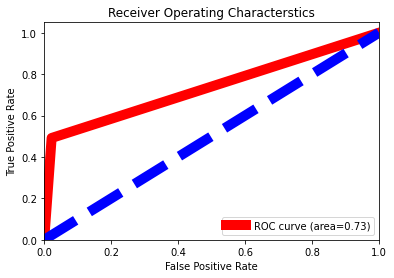

In [189]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(GCV_pred,y_test)
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr,color="red",lw=10, label="ROC curve (area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color="blue", lw=10, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characterstics")
plt.legend(loc="lower right")
plt.show()

# SAVING OUR MODEL

In [190]:
import pickle
filename= "Fraud_detection_dtc.pkl"
pickle.dump(dtc,open(filename,"wb"))

# LOAD THE MODEL

In [191]:
loaded_model=pickle.load(open("Fraud_detection_dtc.pkl","rb"))

result= loaded_model.score(x_test,y_test)
print(result)

0.826530612244898


##### we have achieved around 82% accuracy with our model.

# RESULT:

In [193]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],GCV_pred[:]],index=["predicted","original"])

In [194]:
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195
predicted,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
original,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
